In [2]:
import numpy as np
import pandas as pd

In [3]:
column_names=['user_id','item_id', 'rating', 'timestamp']
movie_columns=['item_id', 'movietitle']
df=pd.read_csv('ratings.csv', sep=',', names=column_names)
movie_titles=pd.read_csv('movies.csv', sep=',', names=movie_columns, encoding='latin-1')
df=pd.merge(df,movie_titles, on='item_id', how='left', sort='False')
moviemat=df.pivot_table(index='user_id', columns='item_id', values='rating')
diff=set(range(1,3953))-set(moviemat.columns)
columns=set(moviemat.columns)

In [4]:
df.head()

,user_id,item_id,rating,timestamp,movietitle
0,1,1,5,978824268,Toy Story (1995)
1,6,1,4,978237008,Toy Story (1995)
2,8,1,4,978233496,Toy Story (1995)
3,9,1,5,978225952,Toy Story (1995)
4,10,1,5,978226474,Toy Story (1995)


In [5]:
moviemat.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#code for inplace splitting of train set
t_items=columns
t_users=np.arange(1,6041)
test_set=pd.DataFrame(index=t_items, columns=t_users)
train_set=pd.DataFrame(index=t_items, columns=t_users)
for user in t_users:
    rated_movies=moviemat.loc[user][moviemat.loc[user].notnull()==True]
    movie_count=rated_movies.count()
    test_set_count=int(0.2*movie_count)
    movie_for_tset=rated_movies.sample(n=test_set_count, replace=False)
    test_set[user][movie_for_tset.index]=movie_for_tset
    movie_for_train_set=rated_movies[~rated_movies.index.isin(movie_for_tset.index)]
    train_set[user][movie_for_train_set.index]=movie_for_train_set
    
#splitting of train set and test set done

In [7]:
test_set.head()

,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_set=train_set.transpose()
test_set=test_set.transpose()
train_set.head()

,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics
mean_X=train_set.copy()
mean_per_user=train_set.mean(axis=1)
mean_X=mean_X.sub(mean_per_user,axis='index')

In [19]:
#adjusted_cosine_similarity
#transpose
X1=(mean_X.fillna(value=0,inplace=False))#mean_x_filled with 0s
X2=X1#no transpose for user based(transpose done in item based)
adjusted_cosine_sim=1-pairwise_distances(X2,metric='cosine')
X4=(pd.DataFrame(data=adjusted_cosine_sim,index=train_set.index,columns=train_set.index)).copy()
#adjusted _cosine_similarity calculation done

In [45]:
adjusted_cosine_sim.shape

(6040, 6040)

In [21]:
#cosine_similarity
mean_X_trans=mean_X.transpose()
X_train_trans=train_set#no transpose for user based(transpose done in item based)
X_train_trans=X_train_trans.fillna(value=0, inplace=False)
cosine_sim=1-pairwise_distances(X_train_trans,metric='cosine')
X3=(pd.DataFrame(data=cosine_sim,index=train_set.index,columns=train_set.index)).copy()
#cosine_similarity_ends

In [22]:
#pearson_correlation
# pearson_sim=1-pairwise_distances(X2,metric='correlation')
# X5=pd.DataFrame(pearson_sim)
#pearson_correlation_ends

In [132]:
###########################begin complete prediction calculation using numpy arrays

#use X4.values for adjusted cosine similarity
#use X3.values for cosine similarity
#use X5.values for pearson correalation


#creating dictionary to map array indices of items to actual item indices in dataframe
dict_indices={}
train_set_indices=train_set.columns
np_array_indices=range(0,len(train_set_indices))
dict_indices=dict(zip(np_array_indices,train_set_indices))  

#create a dictionary to map actual items to numpy indices by reversing dict_indices
rev_indices={v:k for k,v in dict_indices.items()}
#create a dictionary to map actual users to numpy indices
rev_user_indices=dict(zip(test_set.index,range(0,len(test_set.index))))
#creating dictionary to map array indices of users to actual user indices in dataframe
user_indices={v:k for k,v in rev_user_indices.items()}


In [146]:
sorted_item_similarity=(X4.values).copy()
sorted_item_similarity[0]

array([ 1.        ,  0.04756055, -0.05244479, ...,  0.        ,
        0.03092461, -0.00271576])

In [147]:
sorted_item_similarity=(-sorted_item_similarity).argsort(axis=1)
#AXIS='columns'
#(-sign)to do sorting in descending order
#sorting each row in descending order and storing the index of sorted elements
sorted_item_similarity[0]

array([   0, 1336,  378, ..., 2416,   74, 3786], dtype=int64)

In [148]:
#replacing the np indices by actual indices from dictionary (dict_indices)
columns_range=range(0,test_set.index.shape[0])
for i in columns_range:
    sorted_item_similarity[i]=[user_indices[x] for x in sorted_item_similarity[i]]
sorted_item_similarity[0]

array([   1, 1337,  379, ..., 2417,   75, 3787], dtype=int64)

In [150]:
#..........................prediction calculation starts using k nearest neighbours


train_set=train_set.fillna(value=0)
test_set_np=(test_set.values).copy()
test_set_np=test_set_np.astype('float64')
#create numpy arrays for train_set and predictions for faster calculations
train_set_np=(train_set.values).copy()
train_set_np=train_set_np.astype('float64')
predictions=test_set_np.copy()
#creating a dictionary which maps each items to its active users in test set(users who rated that item)
items=list(test_set.columns)
indices={}
for target_item in items:
    active_users=test_set[target_item][test_set[target_item].isnull()==False].index
    indices.update({target_item:active_users})

In [151]:
#Code to generate predictions on a test_set for a given k
k=50
for target_item in items:
    rev_tar_item=rev_indices[target_item]#np index of target item 
    for users in indices[target_item]:
        rev_user_idx=rev_user_indices[users]#np index of user
        #print(rev_user_idx)
        k_sim=sorted_item_similarity[rev_user_idx][1:k]
        #note k_sim contains actual indices of k similar users
        weighted_sum=0
        similarity_sum=0
        for j in k_sim:
            rev_j=rev_user_indices[j]#np index of each similar user j
            
            #change adjusted_cosine_sim to cosine_sim for evaluating using cosine_similarity
            #change adjusted_cosine_sim to pearson_sim for evaluating using pearson correalation
            
            weighted_sum+=adjusted_cosine_sim[rev_user_idx][rev_j]*train_set_np[rev_j][rev_tar_item] 
            similarity_sum+=abs(adjusted_cosine_sim[rev_user_idx][rev_j])
            
        if similarity_sum!=0:
            predictions[rev_user_idx,rev_tar_item]=(weighted_sum/similarity_sum)
        else:
            predictions[rev_user_idx,rev_tar_item]=0

In [152]:
#code to create a set of predictions for evaluation metrics 
pred_dataframe=pd.DataFrame(data=predictions,index=test_set.index,columns=test_set.columns)
pred_dataframe=pred_dataframe.astype('float64')
pred_dataframe=pred_dataframe.add(mean_per_user,axis='index')
absolute_predictions=(pred_dataframe.values).copy()
absolute_predictions=absolute_predictions.astype('float64')
absolute_predictions[absolute_predictions>5]=5
absolute_predictions[absolute_predictions<1]=1


C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


In [153]:
#######################################Calculation of Error metrics##############
# extract all non-nan values from test set and predictions
y_pred=absolute_predictions[~np.isnan(absolute_predictions)]
y_true=test_set_np[~np.isnan(test_set_np)]
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_true,y_pred))
print('MSE:', metrics.mean_squared_error(y_true,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true,y_pred)))
################################Precision and Recall
tp=y_pred[(y_pred>=4) &(y_true>=4)].shape[0]
fp=y_pred[(y_pred>=4) & (y_true<4)].shape[0]
tn=y_pred[(y_pred<4) & (y_true>=4)].shape[0]
precision=tp/(tp+fp)
recall=tp/(tp+tn)
f1_score=2*precision*recall/(precision+recall)
print('precision= ',precision)
print('recall= ',recall)
print('f1 score= ',f1_score)
#..............END of calculation of error metrics

MAE: 0.96798750167
MSE: 1.59461888131
RMSE: 1.26278219868
precision=  0.6660395652740192
recall=  0.812986875342248
f1 score=  0.7322133129693268


In [157]:
##################             plotting error vs k      #################################
from sklearn import metrics

train_set=train_set.fillna(value=0)
test_set_np=(test_set.values).copy()
test_set_np=test_set_np.astype('float64')
#create numpy arrays for train_set and predictions for faster calculations
train_set_np=(train_set.values).copy()
train_set_np=train_set_np.astype('float64')
predictions=test_set_np.copy()
#creating a dictionary which maps each items to its active users in test set(users who rated that item)
items=list(test_set.columns)
indices={}
for target_item in items:
    active_users=test_set[target_item][test_set[target_item].isnull()==False].index
    indices.update({target_item:active_users})

In [158]:
error=[]
k_values=[50,100,200,500,750,1000]
for k in k_values:
    print(k)
    for target_item in items:
        rev_tar_item=rev_indices[target_item]#np index of target item 
        for users in indices[target_item]:
            rev_user_idx=rev_user_indices[users]#np index of user
            #print(rev_user_idx)
            k_sim=sorted_item_similarity[rev_user_idx][1:k]
            #note k_sim contains actual indices of k similar users
            weighted_sum=0
            similarity_sum=0
            for j in k_sim:
                rev_j=rev_user_indices[j]#np index of each similar user j

                #change adjusted_cosine_sim to cosine_sim for evaluating using cosine_similarity
                #change adjusted_cosine_sim to pearson_sim for evaluating using pearson correalation

                weighted_sum+=adjusted_cosine_sim[rev_user_idx][rev_j]*train_set_np[rev_j][rev_tar_item] 
                similarity_sum+=abs(adjusted_cosine_sim[rev_user_idx][rev_j])

            if similarity_sum!=0:
                predictions[rev_user_idx,rev_tar_item]=(weighted_sum/similarity_sum)
            else:
                predictions[rev_user_idx,rev_tar_item]=0
    #error calculation
    pred_dataframe=pd.DataFrame(data=predictions,index=test_set.index,columns=test_set.columns)
    pred_dataframe=pred_dataframe.astype('float64')
    pred_dataframe=pred_dataframe.add(mean_per_user,axis='index')
    absolute_predictions=(pred_dataframe.values).copy()
    absolute_predictions=absolute_predictions.astype('float64')
    absolute_predictions[absolute_predictions>5]=5
    absolute_predictions[absolute_predictions<0]=0
    # extract all non-nan values from test set and predictions
    y_pred=absolute_predictions[~np.isnan(absolute_predictions)]
    y_true=test_set_np[~np.isnan(test_set_np)]
    error.append(metrics.mean_absolute_error(y_true,y_pred))

50


C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less


100
200
500
750
1000


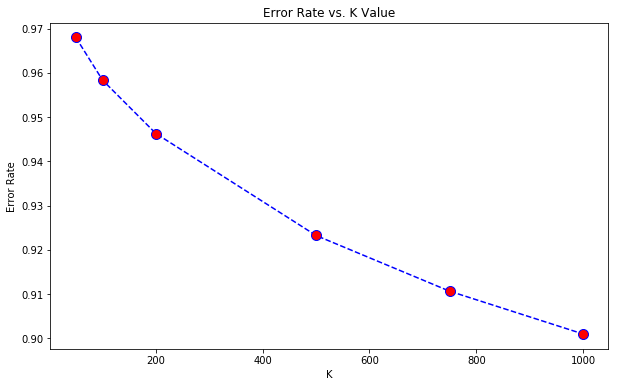

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(k_values,error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig("user_based_error_vs_k.jpeg")
plt.show()